# Initialize


In [106]:
# What version of Python do you have?
import sys

import pandas as pd
import sklearn as sk
import tensorflow as tf
from matplotlib import pyplot as plt


print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.8.0
Keras Version: 2.8.0

Python 3.9.0 (v3.9.0:9cf6752276, Oct  5 2020, 11:29:23) 
[Clang 6.0 (clang-600.0.57)]
Pandas 1.5.2
Scikit-Learn 1.1.3
GPU is NOT AVAILABLE


# Load Data

In [107]:
df = pd.read_csv('/Users/mervar/Library/CloudStorage/OneDrive-IndianaUniversity/cogs-q351/351_FinalProject/Data/cleaned.csv')

y = df.pop('median_house_value')

# Generate a subset for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# Define and Compile Model

In [108]:
# Create a CNN model that trains on the data
def create_model():
    model = keras.Sequential([    
        keras.layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [109]:
# Train the data to use the df to predict y
model = create_model()
model.fit(df, y, epochs=30)

Epoch 1/30
645/645 [==============================] - 1s 1ms/step - loss: 0.3288 - mae: 0.4076 - mse: 0.3288
Epoch 2/30
645/645 [==============================] - 1s 1ms/step - loss: 0.2659 - mae: 0.3606 - mse: 0.2659
Epoch 3/30
645/645 [==============================] - 1s 1ms/step - loss: 0.2513 - mae: 0.3476 - mse: 0.2513
Epoch 4/30
645/645 [==============================] - 1s 1ms/step - loss: 0.2425 - mae: 0.3400 - mse: 0.2425
Epoch 5/30
645/645 [==============================] - 1s 1ms/step - loss: 0.2351 - mae: 0.3340 - mse: 0.2351
Epoch 6/30
645/645 [==============================] - 1s 846us/step - loss: 0.2309 - mae: 0.3297 - mse: 0.2309
Epoch 7/30
645/645 [==============================] - 1s 1ms/step - loss: 0.2258 - mae: 0.3264 - mse: 0.2258
Epoch 8/30
645/645 [==============================] - 1s 860us/step - loss: 0.2226 - mae: 0.3237 - mse: 0.2226
Epoch 9/30
645/645 [==============================] - 1s 817us/step - loss: 0.2187 - mae: 0.3205 - mse: 0.2187
Epoch 10/30
6

# Evaluate Performance

129/129 - 0s - loss: 0.1872 - mae: 0.2968 - mse: 0.1872 - 225ms/epoch - 2ms/step
Testing set Mean Abs Error:  0.30 MPG


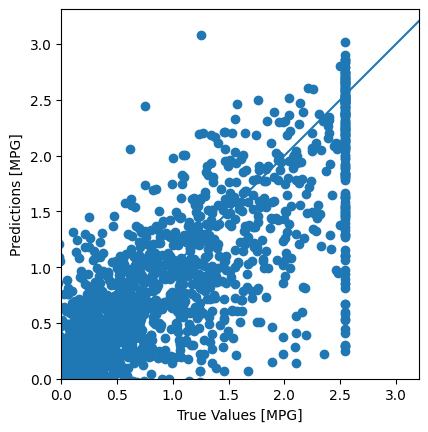

In [110]:
# Evaluate the model
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

# Make predictions
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

# Create a linear regression

In [114]:
# complete a linear regression using the statsmodels library
import statsmodels.api as sm

# create a multivariate linear regression model of the data
# the dependent variable is the 'median_house_value' column
lm = sm.OLS(y, df)

# fit the model to the data
results = lm.fit()
results.summary()

KeyError: 'median_house_value'

# Compare Model to LM

In [ ]:
# Comapre the results of the linear regression to the CNN